<a href="https://colab.research.google.com/github/JMRomeroP/Advanced-Machine-Learning-with-R/blob/master/Trabajo_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  45

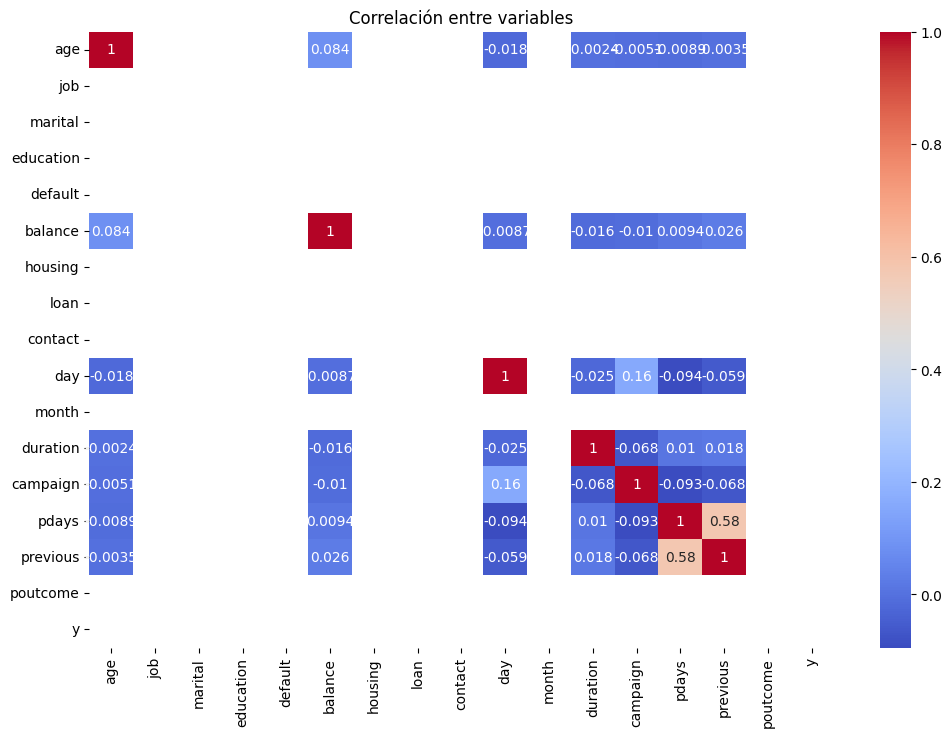

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset, especificando el delimitador (si es diferente a coma)
df = pd.read_csv('bank.csv', delimiter=';') # Reemplaza ';' con el delimitador correcto si es necesario

# Mostrar las primeras filas del dataset
print(df.head())

# Descripción estadística del dataset
print(df.describe())

# Comprobar valores nulos
print(df.isnull().sum())

# Intentar convertir columnas relevantes a numéricas, manejando errores
for col in df.columns:
    if df[col].dtype == 'object': # Si la columna es de tipo objeto (string)
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce') # Intenta convertir a numérico, reemplazando valores no convertibles con NaN
        except:
            pass # Si falla la conversión, ignora la columna

# Visualizar la correlación entre variables (después de la conversión)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Convertir variables categóricas
df = pd.read_csv('bank.csv', delimiter=';')

# Identify the name of your target column after get_dummies
print(df.columns) # Print the columns to find the correct name of the target column

df = pd.get_dummies(df)

# Separar características y target
# Replace 'y_yes' with the actual name of your target column after one-hot encoding
X = df.drop('y_yes', axis=1)
y = df['y_yes']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

# Remodelar datos para la CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Crear la red neuronal convolucional
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8825 - loss: 0.2983 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9995 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 2.4440e-04
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 6.3832e-05
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 8.8122e-06
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9990 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 3.5739e-06
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9982 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 2.2240e-06
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 5.2862e-07
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - lo

In [21]:
!pip install keras-tuner
import keras_tuner as kt


def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=16),
                     kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(hp.Int('units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='my_dir', project_name='cnn_tuning')

tuner.search(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el mejor modelo
loss, accuracy = best_model.evaluate(X_test_cnn, y_test)
print(f'Best Model Loss: {loss}, Best Model Accuracy: {accuracy}')


Trial 5 Complete [00h 00m 15s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 32s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016  
Best Model Loss: 0.001635815715417266, Best Model Accuracy: 1.0


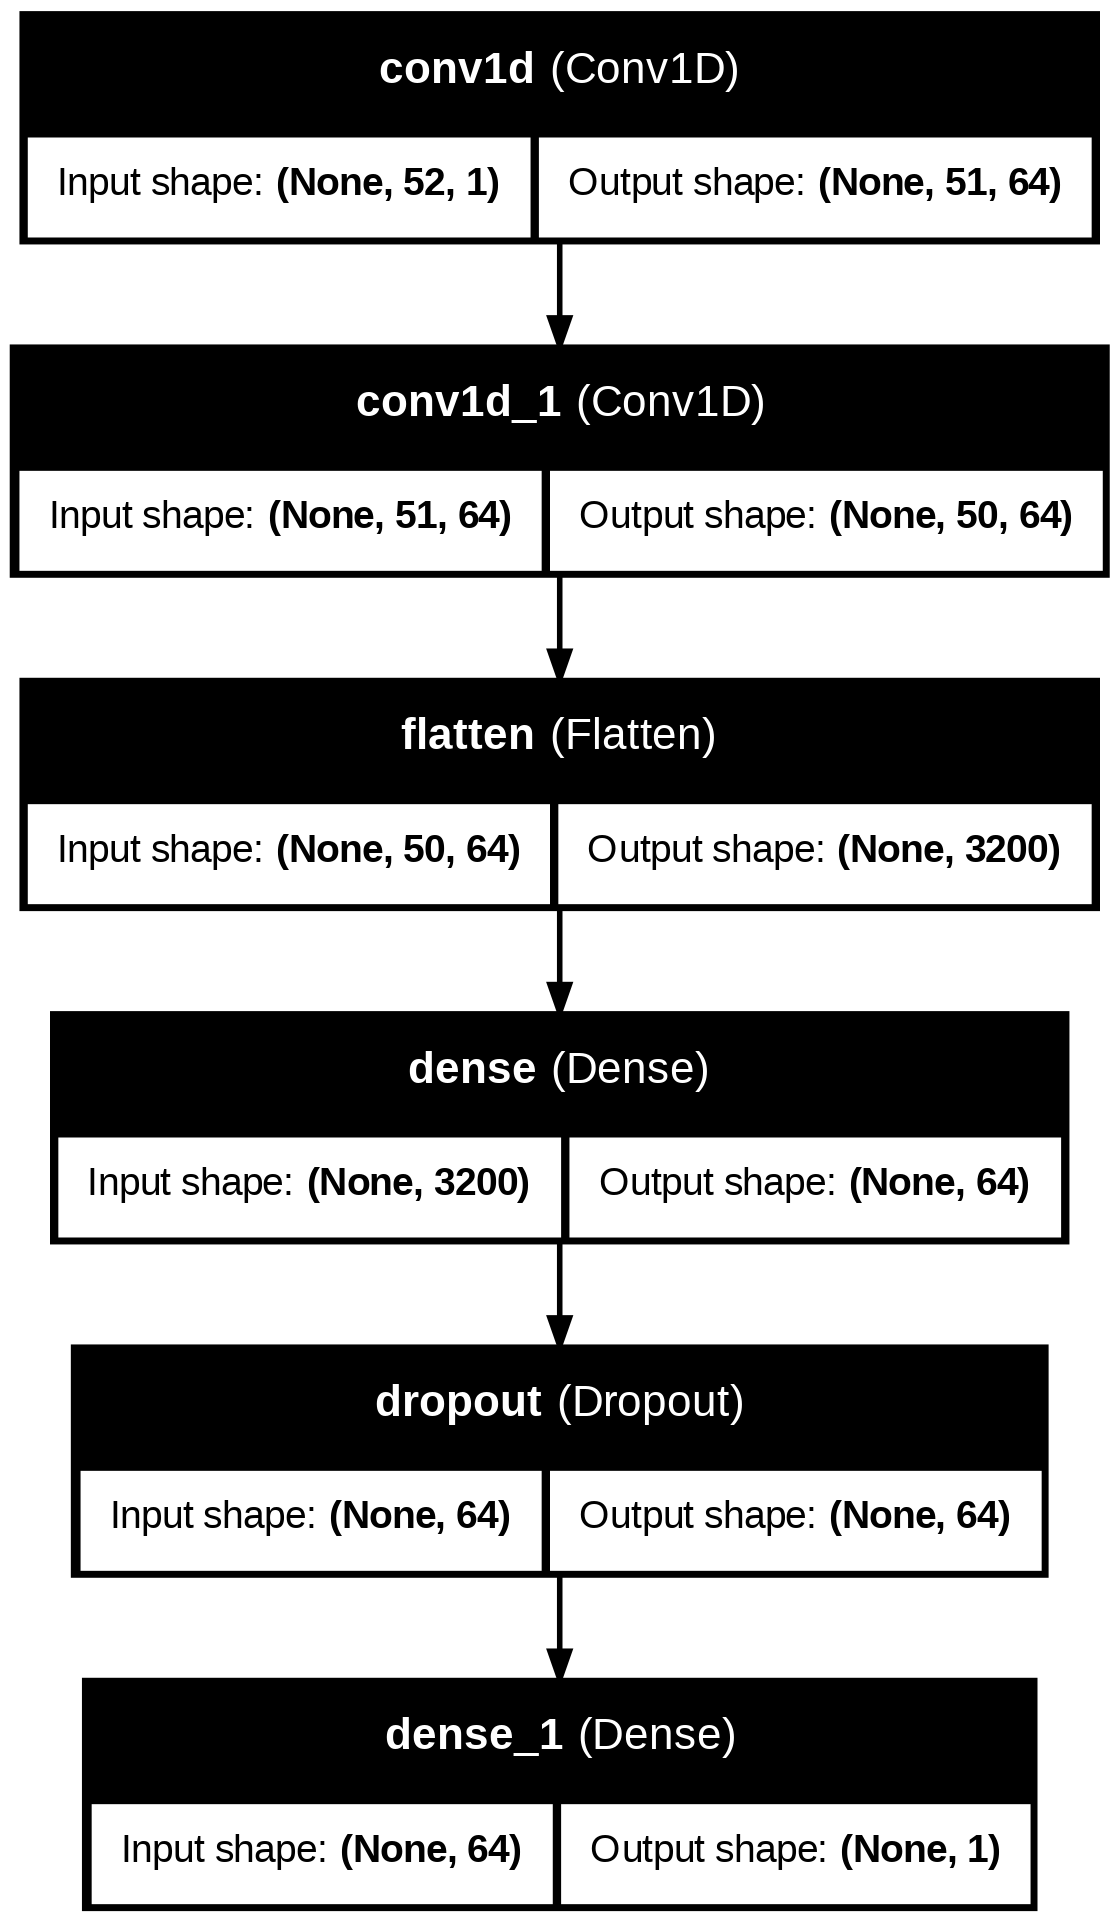

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


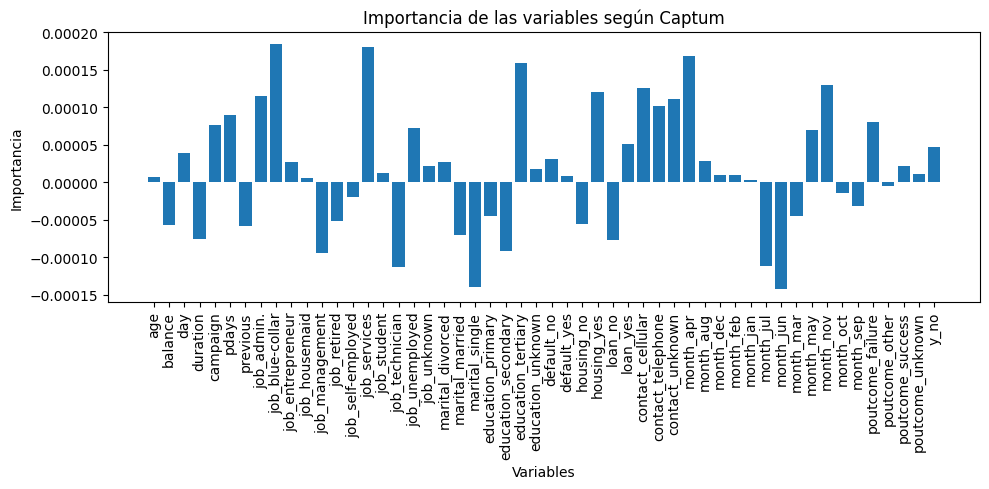

In [42]:
import torch
from torch import nn
import torch.nn.functional as F
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

# ... (Your existing PyTorchModel class and other code) ...

# Calcular las atribuciones
inputs = torch.tensor(X_test_cnn, dtype=torch.float32, requires_grad=True)
attributions, delta = ig.attribute(inputs, target=0, return_convergence_delta=True)

# Detach the attributions from the computation graph and convert to NumPy
attributions = attributions.detach().numpy()

# Calculate the mean importances across all samples, then flatten the array
mean_attributions = attributions.mean(axis=0).flatten()

# Visualizar la importancia de las características
plt.figure(figsize=(10,5))
plt.bar(X.columns, mean_attributions)  # Use the flattened array here
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables según Captum')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()